# Datos de la Bolsa de Madrid

In [22]:
#Importamos la Librerias
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

In [23]:
#Enlace de la Bolsa Madrid
url="https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000"
path='csv/bolsaMadrid.csv'

In [24]:
#Haremos el request a esa ruta
#Procesamos el HTML mediante BeautifulSoap
req = requests.get(url).text
soup = BeautifulSoup(req, "lxml")

# Tabla

In [25]:
# Obtenemos la tabla por un ID específico
table = soup.find("table", {"id":"ctl00_Contenido_tblAcciones"})

In [26]:
name=""
price=""
diferencia=""
maximo=""
minimo=""
numRow=0

for row in table.find_all("tr"):
  numCell=0
  for cell in row.find_all("td"):
    if numCell == 0:
      name=cell.text
      
      print("Accion:", name)
    if numCell == 1:
      price=cell.text

      print("Ultimo:", price)
    if numCell == 2:
      diferencia=cell.text
      print("Diferencia:", diferencia)
    if numCell == 3:
      maximo=cell.text
      print("Maximo:", maximo)
    if numCell == 4:
      minimo=cell.text
      print("Minimo:", minimo,'\n')
    numCell+=1
  numRow+=1    
  

  #Creamos el CSV
  with open(path, 'a',  newline="") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow([name, price, diferencia, maximo, minimo, datetime.now()])
  csv_file.close()
df = pd.read_csv(path)

Accion: ACCIONA
Ultimo: 157,0000
Diferencia: -1,32
Maximo: 160,0000
Minimo: 155,5000 

Accion: ACERINOX
Ultimo: 11,2200
Diferencia: -1,41
Maximo: 11,4800
Minimo: 11,2150 

Accion: ACS
Ultimo: 23,3100
Diferencia: 4,72
Maximo: 23,3500
Minimo: 22,1500 

Accion: AENA
Ultimo: 151,2500
Diferencia: 3,60
Maximo: 151,2500
Minimo: 145,2000 

Accion: ALMIRALL
Ultimo: 12,3900
Diferencia: -2,21
Maximo: 12,9200
Minimo: 12,3700 

Accion: AMADEUS
Ultimo: 61,9400
Diferencia: 4,70
Maximo: 62,3800
Minimo: 57,2600 

Accion: ARCELORMIT.
Ultimo: 27,9500
Diferencia: -1,64
Maximo: 28,4200
Minimo: 27,5950 

Accion: B.SANTANDER
Ultimo: 3,2840
Diferencia: 1,44
Maximo: 3,3190
Minimo: 3,2150 

Accion: BA.SABADELL
Ultimo: 0,6734
Diferencia: 0,57
Maximo: 0,6800
Minimo: 0,6658 

Accion: BANKINTER
Ultimo: 4,9670
Diferencia: 1,82
Maximo: 5,0040
Minimo: 4,8760 

Accion: BBVA
Ultimo: 6,0260
Diferencia: -0,23
Maximo: 6,1070
Minimo: 5,9970 

Accion: CAIXABANK
Ultimo: 2,5060
Diferencia: 1,58
Maximo: 2,5270
Minimo: 2,4600 



In [27]:
#Creamos las columnas para el DataFrame
columnsName = ["Accion", "Precio", "%Diferencia", "Maximo", "Minimo", "Fecha"]
df.columns = columnsName

#Eliminamos Datos NaN
df = df.dropna()


#Convertimos en float

df['Precio'] = [str(x).replace(',','.') for x in df['Precio']]
df['Precio'] = df['Precio'].astype(float)


df['%Diferencia'] = [str(x).replace(',','.') for x in df['%Diferencia']]
df['%Diferencia'] = df['%Diferencia'].astype(float)

df['Minimo'] = [str(x).replace(',','.') for x in df['Minimo']]
df['Minimo'] = df['Minimo'].astype(float)

df['Maximo'] = [str(x).replace(',','.') for x in df['Maximo']]
df['Maximo'] = df['Maximo'].astype(float)



#Ordenamos la columna Precio
df=df.sort_values("Precio")
df.to_csv(path)
df.shape
df

,Accion,Precio,%Diferencia,Maximo,Minimo,Fecha
8,BA.SABADELL,0.6734,0.57,0.6800,0.6658,2021-11-07 19:48:31.323895
24,MAPFRE,1.9430,1.52,1.9525,1.8950,2021-11-07 19:48:31.350974
19,IAG,2.0950,6.13,2.1000,1.9030,2021-11-07 19:48:31.341228
11,CAIXABANK,2.5060,1.58,2.5270,2.4600,2021-11-07 19:48:31.331254
7,B.SANTANDER,3.2840,1.44,3.3190,3.2150,2021-11-07 19:48:31.322864
33,TELEFONICA,3.7660,2.78,3.8030,3.6480,2021-11-07 19:48:31.362006
9,BANKINTER,4.9670,1.82,5.0040,4.8760,2021-11-07 19:48:31.327219
10,BBVA,6.0260,-0.23,6.1070,5.9970,2021-11-07 19:48:31.330471
25,MELIA HOTELS,6.9060,8.18,6.9100,6.2500,2021-11-07 19:48:31.352007
23,INM.COLONIAL,8.6750,2.18,8.7000,8.3450,2021-11-07 19:48:31.350085


# Mayor Ganancia y Mayor Pérdida

In [28]:
#Calculamos Maximo y minimo
maxGanancia = df['Precio'].max()
maxPerdida = df['Precio'].min()
print("Mayor ganancia:", maxGanancia, "\nMayor pérdida:",maxPerdida)

Mayor ganancia: 157.0 
Mayor pérdida: 0.6734


# Gráfico

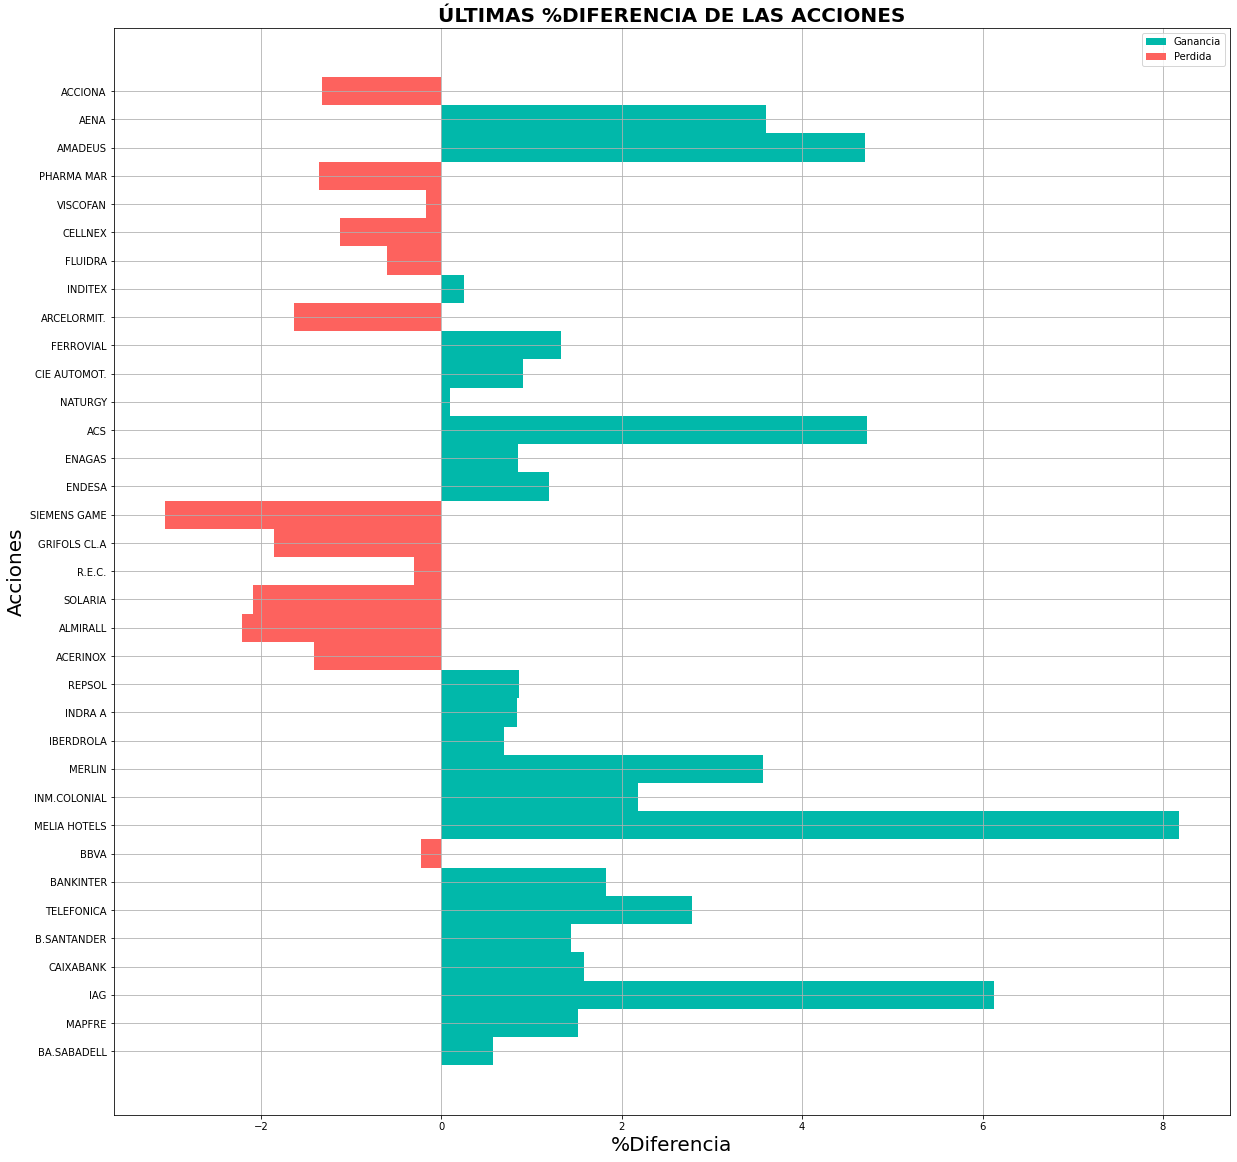

In [30]:

x = df['Accion']
y = df['%Diferencia']

plt.figure(figsize=(20,20))

mayG = df['%Diferencia']  > 0
mayP = df['%Diferencia'] <= 0

mY=plt.barh(x, y, mayG, color='#01b8aa', label="Ganancia")
my=plt.barh(x, y, mayP, color='#fd625e', label="Perdida")

plt.ylabel('Acciones',fontsize=20)
plt.xlabel('%Diferencia',fontsize=20)
plt.title('ÚLTIMAS %DIFERENCIA DE LAS ACCIONES',fontsize=20, fontweight='bold')
plt.legend()
plt.grid()
plt.show();

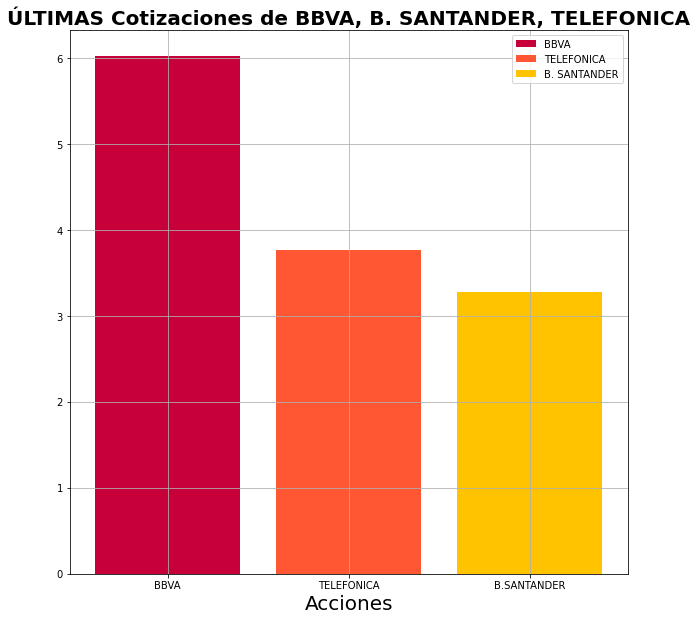

In [29]:
## BBVA 
xBBVA = df.Accion[df.Accion == "BBVA"]
yBBVA = df.Precio[df.Accion == "BBVA"]



## TELEFONICA
xTEL = df.Accion[df.Accion == "TELEFONICA"]
yTEL = df.Precio[df.Accion == "TELEFONICA"]

## B. SANTANDER
xSANT = df.Accion[df.Accion == "B.SANTANDER"]
ySANT = df.Precio[df.Accion == "B.SANTANDER"]



## GRAFICA
plt.figure(figsize=(10,10))
bbva=plt.bar(xBBVA, yBBVA, color='#c70039', label="BBVA")
tel=plt.bar(xTEL, yTEL, color='#ff5733', label="TELEFONICA")
sant=plt.bar(xSANT, ySANT, color='#ffc300', label="B. SANTANDER")

plt.grid()
plt.xlabel('Acciones',fontsize=20)
plt.title('ÚLTIMAS Cotizaciones de BBVA, B. SANTANDER, TELEFONICA',fontsize=20, fontweight='bold')
plt.legend()
plt.show();